In [1]:
from typing import Optional

import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

palette = sns.color_palette(palette='Dark2')

In [36]:
figures_dir = "../figures"

task_dfs = {
    "NQ": pd.read_csv("../evaluation_results/nq.csv"),
}


In [68]:
def plot_decore_EM(df, model_name: str, task_name: str, alpha: Optional[float] = None, masked_heads: int = 0, decoder_name: str = "DeCoReVanilla"):
    metrics = {
        "NQ": {
            'Subspan_EM': 'Subspan EM'
        }
    }

    metric_names = {
        "NQ": "EM Score",
    }

    df = df.loc[(df['model.name'] == model_name) & (df['State'] == "finished") & (df["decoder.name"] == decoder_name)]

    # For baseline models
    df["decoder.configs.num_retrieval_heads"].fillna(0, inplace=True)
    df["decoder.configs.num_retrieval_heads"] = df["decoder.configs.num_retrieval_heads"].apply(lambda x: x if x else 0)

    if masked_heads < 0:
        head_type = "Random Heads"
    else:
        head_type = "Retrieval Heads"

    if alpha:
        df = df.loc[df['decoder.configs.alpha'] == alpha]

    if masked_heads:
        df = df.loc[df['decoder.configs.num_retrieval_heads'] == masked_heads]
        if masked_heads < 0:
            df["decoder.configs.num_retrieval_heads"] = df["decoder.configs.num_retrieval_heads"].apply(lambda x: -x if x < 0 else x)

    df["Gold At"] = df["data.variation"].apply(lambda x: int(x[-1]) if x.startswith("gold_at_") else "Oracle")

    columns = {
        'decoder.configs.num_retrieval_heads': f'Num. Masked {head_type}',
    }
    columns.update(metrics[task_name])
    # # Rename columns for plotting
    df.rename(columns=columns, inplace=True)

    # Melt the DataFrame to have a long-form DataFrame suitable for seaborn
    df_melted = df.melt(id_vars="Gold At", 
                        value_vars=list(metrics[task_name].values()),
                        var_name='Metric', value_name=metric_names[task_name])
    
    oracle_subspan_em = df_melted.loc[df_melted['Gold At'] == "Oracle", "EM Score"].values[0]
    print(oracle_subspan_em)
    print(df_melted.loc[df_melted['Gold At'] != "Oracle"])

    # Create the plot
    plt.figure(figsize=(10, 6))

    ax = plt.gca()
    ax.axhline(y=oracle_subspan_em, color='r', linestyle='--', label='Oracle Subspan EM')
    sns.lineplot(data=df_melted.loc[df_melted['Gold At'] != "Oracle"], x="Gold At", y=metric_names[task_name], marker='o', palette=palette, ax=ax)

    # Add titles and labels
    title = f"{model_name}_{decoder_name} (Masked {head_type}: {masked_heads}"
    if alpha:
        title += f"; Alpha: {alpha})"
    else:
        title += ")"
    plt.title(title)
    plt.xlabel(f'Gold at')
    plt.ylabel(metric_names[task_name])

    # Show the plot
    plt.legend(title='Metric')

    # plt.savefig(os.path.join(figures_dir, f"{task_name}_{metric_names[task_name]}_{model_name}_{decoder_name}_masked_retrieval.pdf"), dpi=300, format='pdf')
    plt.show()

In [71]:
def draw_line_plot_decore_EM_by_masked_heads_by_task(task_name):
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b", task_name, masked_heads=0, decoder_name="Baseline")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b", task_name, masked_heads=10, decoder_name="BaselineMaskedRetrievalHead")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b", task_name, masked_heads=-10, decoder_name="BaselineMaskedNonRetrievalHead")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b", task_name, masked_heads=10, alpha=0.1, decoder_name="DeCoReVanilla")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b", task_name, masked_heads=10, alpha=0.5, decoder_name="DeCoReVanilla")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b", task_name, masked_heads=10, alpha=1.0, decoder_name="DeCoReVanilla")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b-Instruct", task_name, masked_heads=0, decoder_name="Baseline")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b-Instruct", task_name, masked_heads=10, decoder_name="BaselineMaskedRetrievalHead")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b-Instruct", task_name, masked_heads=10, alpha=0.1, decoder_name="DeCoReVanilla")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b-Instruct", task_name, masked_heads=10, alpha=0.5, decoder_name="DeCoReVanilla")
    plot_decore_EM(task_dfs[task_name], "LLaMA3-8b-Instruct", task_name, masked_heads=10, alpha=1.0, decoder_name="DeCoReVanilla")

## NQ

0.2248587570621469
  Gold At      Metric  EM Score
1       9  Subspan EM  0.176271
2       4  Subspan EM  0.126930
3       0  Subspan EM  0.125424


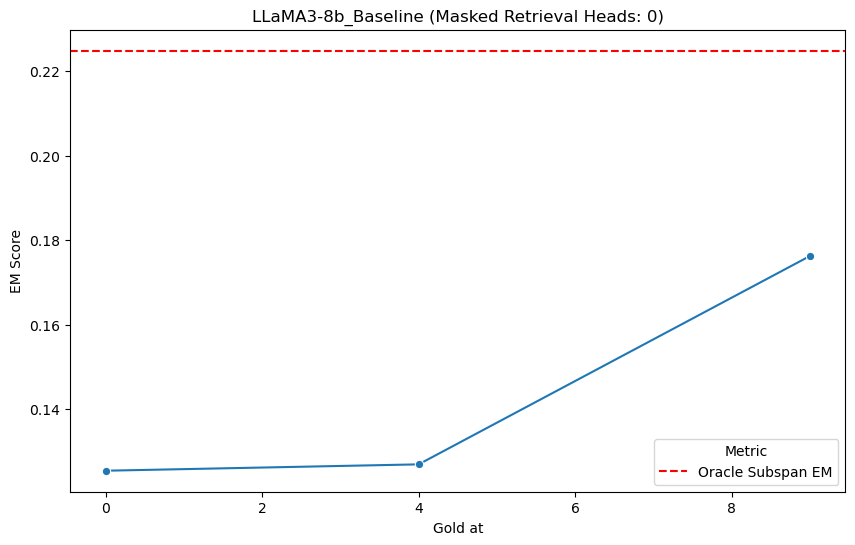

0.1958568738229755
  Gold At      Metric  EM Score
2       9  Subspan EM  0.145009
3       4  Subspan EM  0.105085
4       0  Subspan EM  0.101695


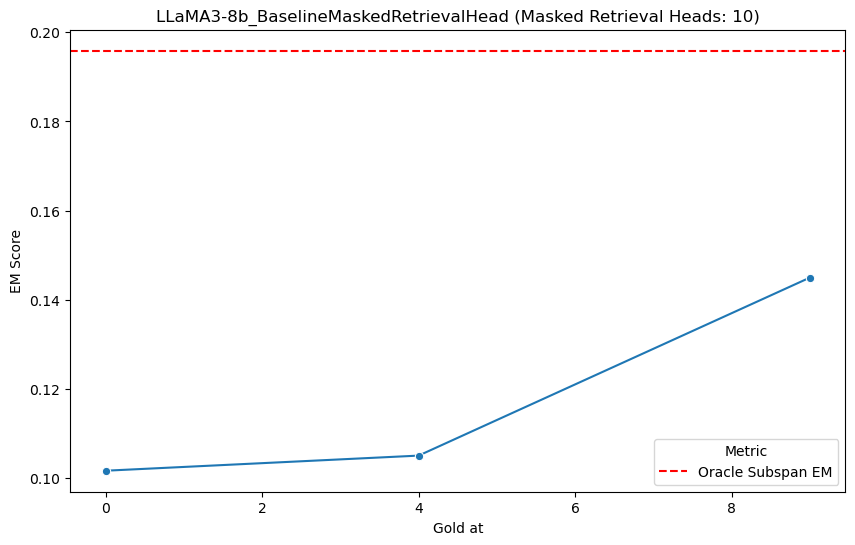

0.2139359698681733
  Gold At      Metric  EM Score
2       9  Subspan EM  0.171751
3       4  Subspan EM  0.124670
4       0  Subspan EM  0.125047


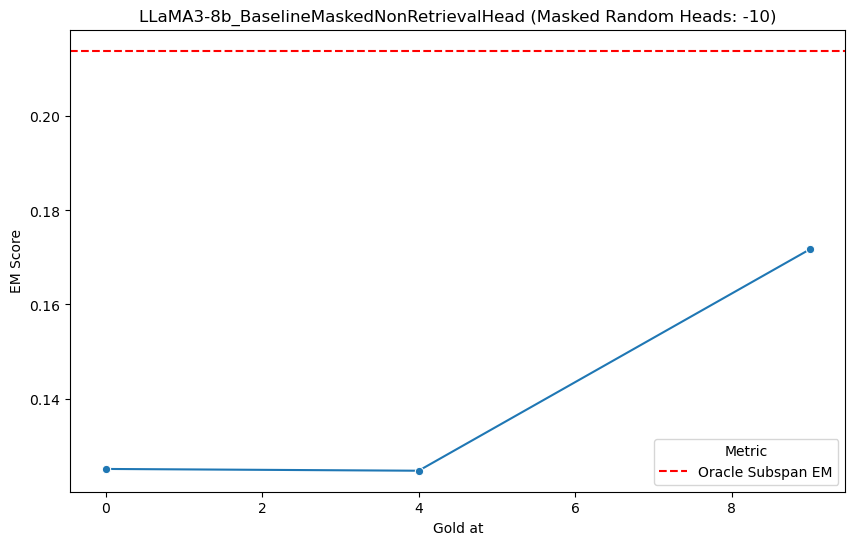

0.2301318267419962
  Gold At      Metric  EM Score
1       9  Subspan EM  0.180414
2       4  Subspan EM  0.128814
3       0  Subspan EM  0.128814


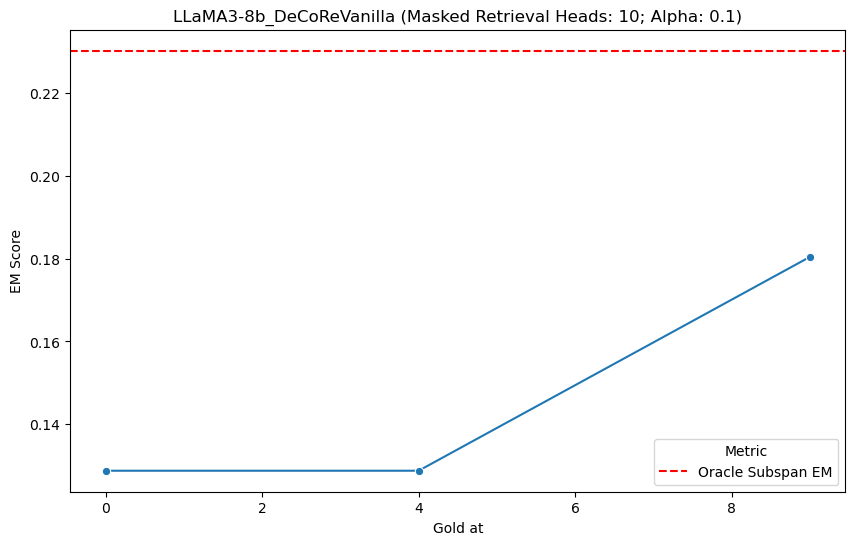

0.2425612052730696
  Gold At      Metric  EM Score
1       9  Subspan EM  0.134087
2       4  Subspan EM  0.131073
3       0  Subspan EM  0.123917


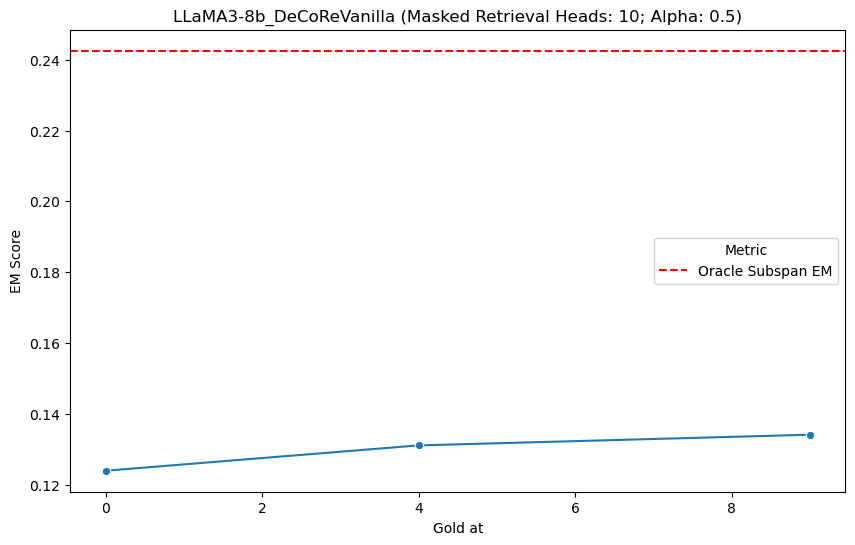

0.2546139359698682
  Gold At      Metric  EM Score
1       9  Subspan EM  0.137100
2       4  Subspan EM  0.134463
3       0  Subspan EM  0.124670


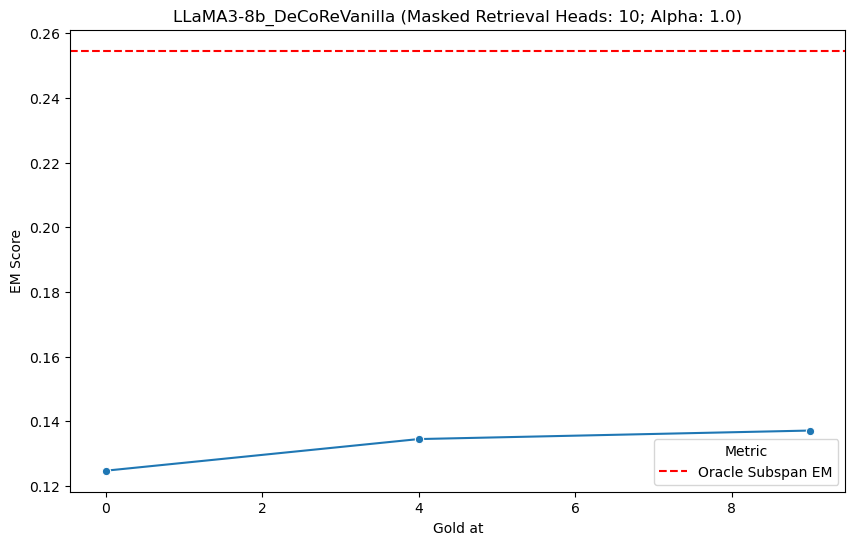

0.6896421845574388
  Gold At      Metric  EM Score
1       9  Subspan EM  0.337476
2       4  Subspan EM  0.377778
3       0  Subspan EM  0.415819


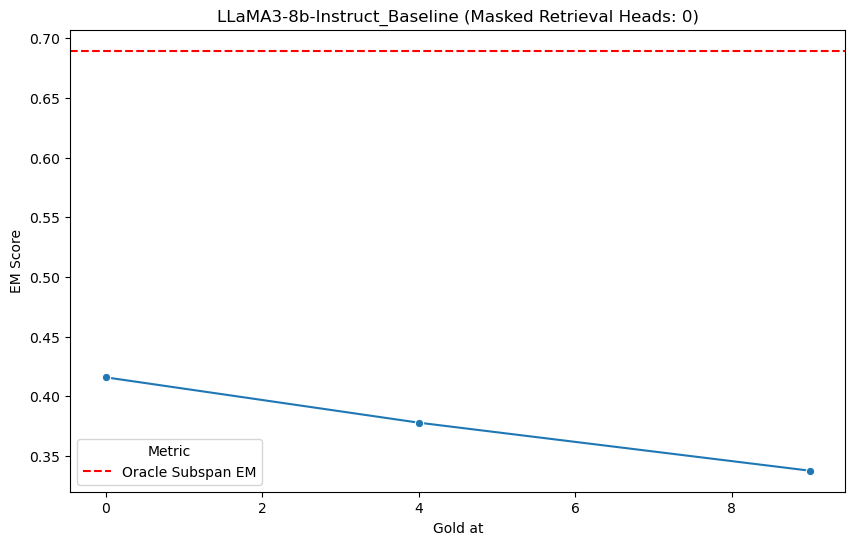

0.6410546139359699
  Gold At      Metric  EM Score
1       9  Subspan EM  0.287382
2       4  Subspan EM  0.310734
3       0  Subspan EM  0.350659


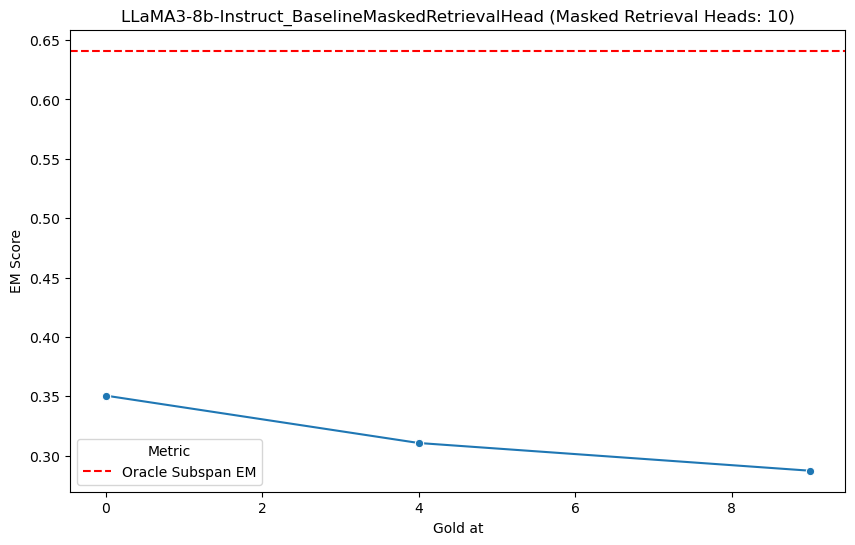

0.6900188323917138
  Gold At      Metric  EM Score
1       9  Subspan EM  0.339360
2       4  Subspan EM  0.376271
3       0  Subspan EM  0.416196


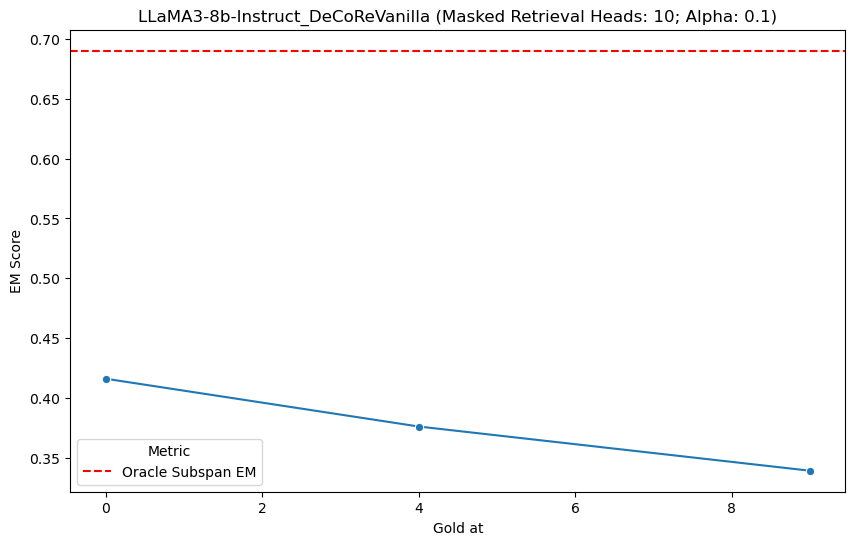

0.6903954802259887
  Gold At      Metric  EM Score
1       9  Subspan EM  0.122034
2       4  Subspan EM  0.136347
3       0  Subspan EM  0.120904


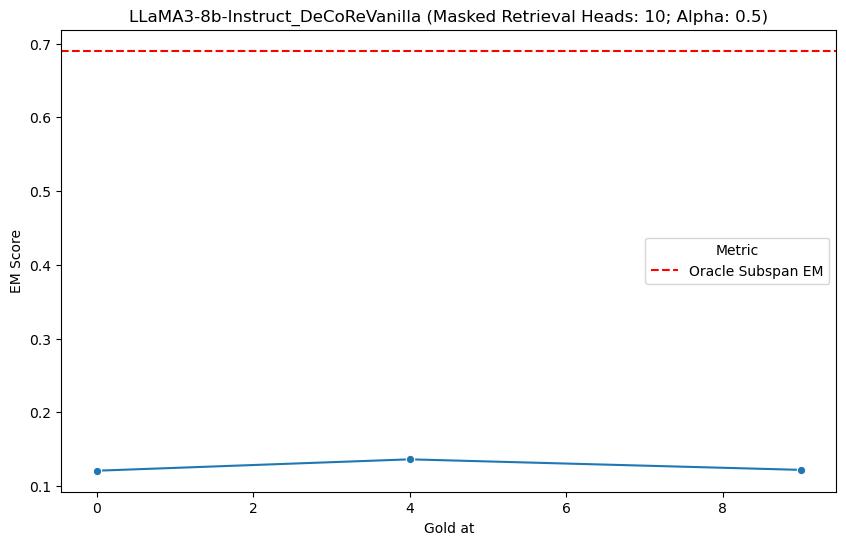

0.6787193973634652
  Gold At      Metric  EM Score
1       9  Subspan EM  0.108098
2       4  Subspan EM  0.123917
3       0  Subspan EM  0.109981


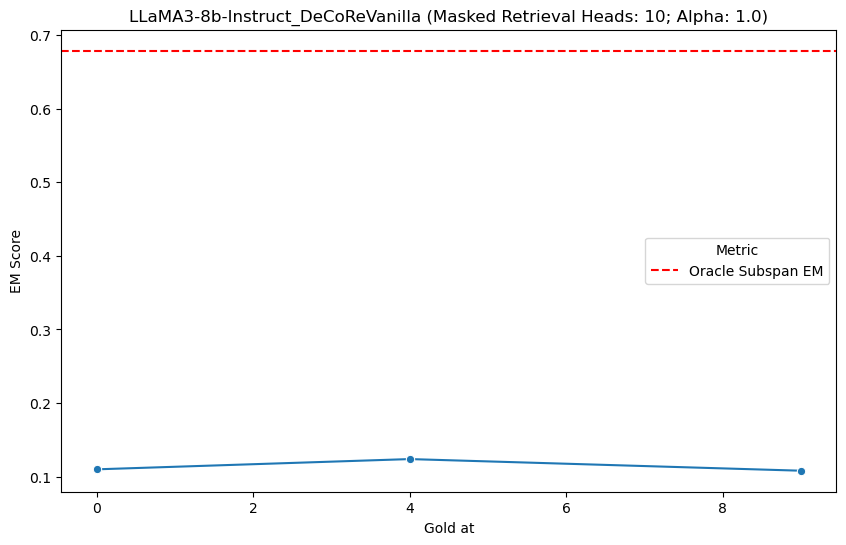

In [72]:
draw_line_plot_decore_EM_by_masked_heads_by_task("NQ")